In [ ]:
import torch
import torchvision
import tqdm
import os

In [2]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
import numpy
# from datasets import load_dataset

cache_directory = "/home/jgryu/Weight_compression/model_dict/huggingface" 
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50", cache_directory = cache_directory)

state_dict = model.state_dict()

flat_weight = torch.empty(1, )
flat_bias = torch.empty(1, )
flat_running_mean = torch.empty(1, )
flat_running_var = torch.empty(1, )


for k, v in state_dict.items():
    # print(k)
    # print(v.shape)
    v_flatten = v.flatten()

    if 'weight' in k:
        flat_weight = torch.cat((flat_weight, v_flatten), dim=0)
    elif 'bias' in k:
        flat_bias = torch.cat((flat_bias, v_flatten), dim=0)
    elif 'running_mean' in k:
        flat_running_mean = torch.cat((flat_running_mean, v_flatten), dim=0)
    elif 'running_var' in k:
        flat_running_var = torch.cat((flat_running_var, v_flatten), dim=0)
        

flat_weight = flat_weight[1:]
flat_bias = flat_bias[1:]
flat_running_mean = flat_running_mean[1:]
flat_running_var = flat_running_var[1:]
print(flat_weight.shape)
print(flat_bias.shape)
print(flat_running_mean.shape)
print(flat_running_var.shape)



/home/jgryu/miniconda3/envs/Wcomp/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([25529472])
torch.Size([27560])
torch.Size([26560])
torch.Size([26560])


In [8]:
parm_names = ['weight', 'bias', 'running_mean', 'running_var']

for i, p in  enumerate(parm_names):

    if p == 'weight':
        parms = flat_weight
    elif p == 'bias':
        parms = flat_bias
    elif p == 'running_mean':
        parms = flat_running_mean
    elif p == 'running_var':
        parms = flat_running_var

    print(p)
    print(f'mean: {parms.mean()}')
    print(f'max: {parms.max()}')
    print(f'min: {parms.min()}')

weight
mean: -0.016457505524158478
max: 12.057271957397461
min: -7.446868896484375
bias
mean: -1.2600873708724976
max: 33.845672607421875
min: -17.01458740234375
running_mean
mean: -3.5094850063323975
max: 76.05267333984375
min: -97.45030975341797
running_var
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45


In [10]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
import numpy
# from datasets import load_dataset

cache_directory = "/home/jgryu/Weight_compression/model_dict/huggingface" 
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50", cache_dir = cache_directory)

state_dict = model.state_dict()
for k, v in state_dict.items():
    print(k)
    print(v.shape)

resnet.embedder.embedder.convolution.weight
torch.Size([64, 3, 7, 7])
resnet.embedder.embedder.normalization.weight
torch.Size([64])
resnet.embedder.embedder.normalization.bias
torch.Size([64])
resnet.embedder.embedder.normalization.running_mean
torch.Size([64])
resnet.embedder.embedder.normalization.running_var
torch.Size([64])
resnet.embedder.embedder.normalization.num_batches_tracked
torch.Size([])
resnet.encoder.stages.0.layers.0.shortcut.convolution.weight
torch.Size([256, 64, 1, 1])
resnet.encoder.stages.0.layers.0.shortcut.normalization.weight
torch.Size([256])
resnet.encoder.stages.0.layers.0.shortcut.normalization.bias
torch.Size([256])
resnet.encoder.stages.0.layers.0.shortcut.normalization.running_mean
torch.Size([256])
resnet.encoder.stages.0.layers.0.shortcut.normalization.running_var
torch.Size([256])
resnet.encoder.stages.0.layers.0.shortcut.normalization.num_batches_tracked
torch.Size([])
resnet.encoder.stages.0.layers.0.layer.0.convolution.weight
torch.Size([64, 64, 1,

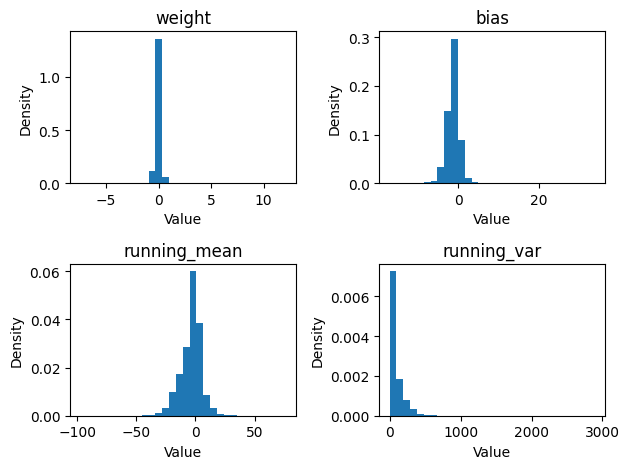

In [5]:
import matplotlib.pyplot as plt

parm_names = ['weight', 'bias', 'running_mean', 'running_var']

fig = plt.figure()
for i, p in  enumerate(parm_names):
    ax = fig.add_subplot(2, 2, i+1)

    if p == 'weight':
        parms = flat_weight
    elif p == 'bias':
        parms = flat_bias
    elif p == 'running_mean':
        parms = flat_running_mean
    elif p == 'running_var':
        parms = flat_running_var

    ax.hist(parms, bins=30, density=True)
    plt.title(p)
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [7]:
# model = torch.hub.load('pytorch/vision', "fcn_resnet50", pretrained = False)
# weight_dict = model.state_dict()

# model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")
# state_dict = model.state_dict()

state_dict = torch.load("/home/jgryu/Weight_compression/model_dict/timm/vit_base_patch16_224.pt")
for k, v in state_dict.items():
    print(k)
    print(v.shape)


cls_token
torch.Size([1, 1, 768])
pos_embed
torch.Size([1, 197, 768])
patch_embed.proj.weight
torch.Size([768, 3, 16, 16])
patch_embed.proj.bias
torch.Size([768])
blocks.0.norm1.weight
torch.Size([768])
blocks.0.norm1.bias
torch.Size([768])
blocks.0.attn.qkv.weight
torch.Size([2304, 768])
blocks.0.attn.qkv.bias
torch.Size([2304])
blocks.0.attn.proj.weight
torch.Size([768, 768])
blocks.0.attn.proj.bias
torch.Size([768])
blocks.0.norm2.weight
torch.Size([768])
blocks.0.norm2.bias
torch.Size([768])
blocks.0.mlp.fc1.weight
torch.Size([3072, 768])
blocks.0.mlp.fc1.bias
torch.Size([3072])
blocks.0.mlp.fc2.weight
torch.Size([768, 3072])
blocks.0.mlp.fc2.bias
torch.Size([768])
blocks.1.norm1.weight
torch.Size([768])
blocks.1.norm1.bias
torch.Size([768])
blocks.1.attn.qkv.weight
torch.Size([2304, 768])
blocks.1.attn.qkv.bias
torch.Size([2304])
blocks.1.attn.proj.weight
torch.Size([768, 768])
blocks.1.attn.proj.bias
torch.Size([768])
blocks.1.norm2.weight
torch.Size([768])
blocks.1.norm2.bias
to

In [13]:
from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
import numpy

state_dict = torch.load("/home/jgryu/Weight_compression/model_dict/timm/vit_base_patch16_224.pt")
# for k, v in state_dict.items():
#     print(k)
#     print(v.shape)

qkv_w = torch.empty(1, )
qkv_b = torch.empty(1, )
proj_w = torch.empty(1, )
proj_b = torch.empty(1, )
fc_w = torch.empty(1, )
fc_b = torch.empty(1, )
norm_w = torch.empty(1, )
norm_b = torch.empty(1, )


for k, v in state_dict.items():
    # print(k)
    # print(v.shape)
    v_flatten = v.flatten()

    if 'qkv' in k:
        if 'weight' in k:
            qkv_w = torch.cat((qkv_w, v_flatten), dim=0)
        elif 'bias' in k:
            qkv_b = torch.cat((qkv_b, v_flatten), dim=0)
    elif 'attn' in k and 'proj' in k:
        if 'weight' in k:
            proj_w = torch.cat((proj_w, v_flatten), dim=0)
        elif 'bias' in k:
            proj_b = torch.cat((proj_b, v_flatten), dim=0)
    elif 'fc' in k:
        if 'weight' in k:
            fc_w = torch.cat((fc_w, v_flatten), dim=0)
        elif 'bias' in k:
            fc_b = torch.cat((fc_b, v_flatten), dim=0)
    elif 'norm' in k:
        if 'weight' in k:
            norm_w = torch.cat((norm_w, v_flatten), dim=0)
        elif 'bias' in k:
            norm_b = torch.cat((norm_b, v_flatten), dim=0)


qkv_w = qkv_w[1:]
qkv_b = qkv_b[1:]
proj_w = proj_w[1:]
proj_b = proj_b[1:]
fc_w = fc_w[1:]
fc_b = fc_b[1:]
norm_w = norm_w[1:]
norm_b = norm_b[1:]


print(qkv_w.shape)
print(qkv_b.shape)
print(proj_w.shape)
print(proj_b.shape)
print(fc_w.shape)
print(fc_b.shape)
print(norm_w.shape)
print(norm_b.shape)



torch.Size([21233664])
torch.Size([27648])
torch.Size([7077888])
torch.Size([9216])
torch.Size([56623104])
torch.Size([46080])
torch.Size([19200])
torch.Size([19200])


<Figure size 640x480 with 0 Axes>

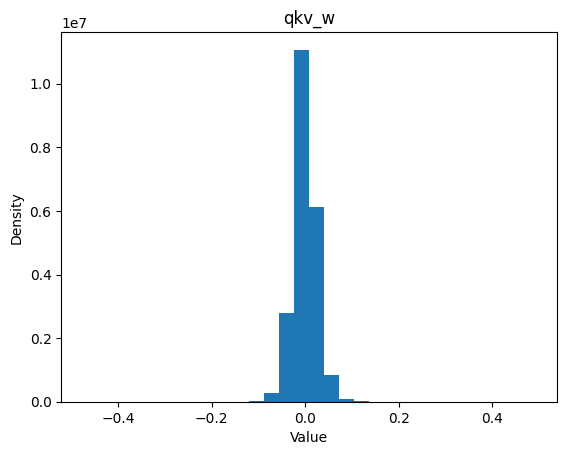

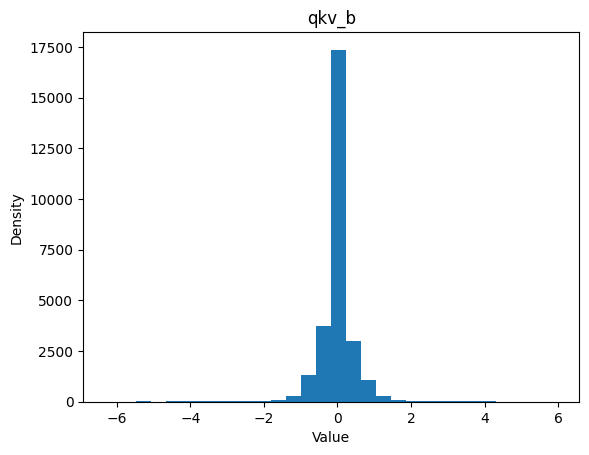

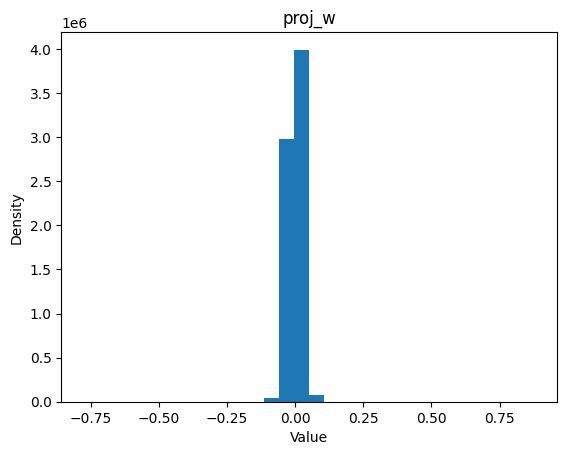

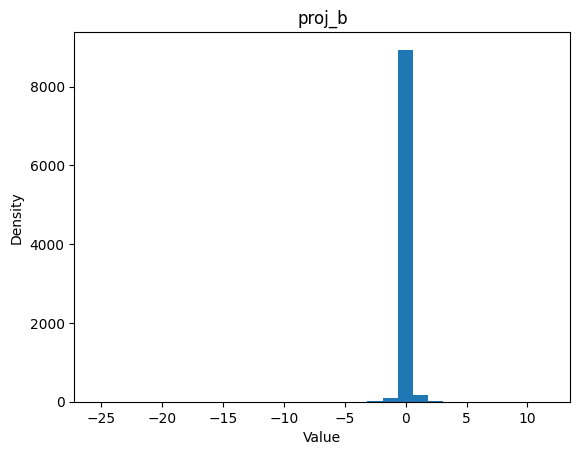

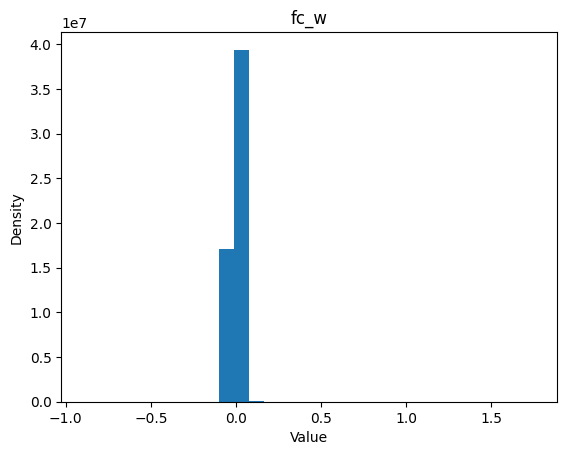

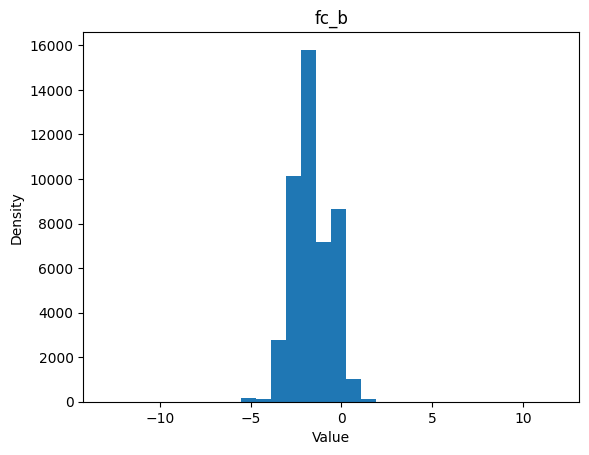

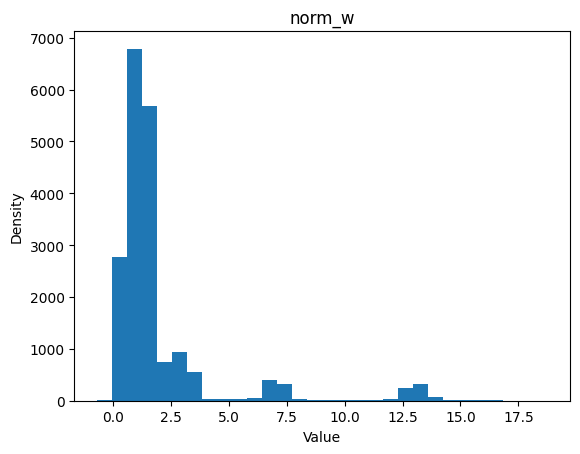

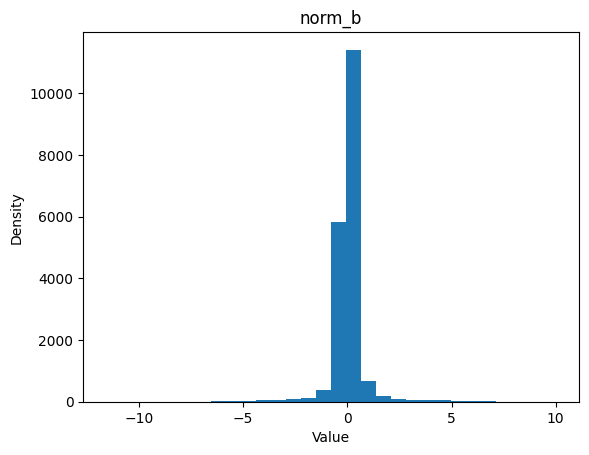

In [16]:
import matplotlib.pyplot as plt

parm_names = ['qkv_w', 'qkv_b', 'proj_w', 'proj_b', 'fc_w', 'fc_b', 'norm_w', 'norm_b']

fig = plt.figure()
for i, p in  enumerate(parm_names):
    fig, ax = plt.subplots()
    if p == 'qkv_w':
        parms = qkv_w
    elif p == 'qkv_b':
        parms = qkv_b
    elif p == 'proj_w':
        parms = proj_w
    elif p == 'proj_b':
        parms = proj_b
    elif p == 'fc_w':
        parms = fc_w
    elif p == 'fc_b':
        parms = fc_b
    elif p == 'norm_w':
        parms = norm_w
    elif p == 'norm_b':
        parms = norm_b

    ax.hist(parms, bins=30, density=False)
    ax.set_title(p)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    plt.show()


In [17]:
parm_names = ['qkv_w', 'qkv_b', 'proj_w', 'proj_b', 'fc_w', 'fc_b', 'norm_w', 'norm_b']


for i, p in  enumerate(parm_names):

    if p == 'qkv_w':
        parms = flat_weight
    elif p == 'qkv_b':
        parms = flat_bias
    elif p == 'proj_w':
        parms = flat_running_mean
    elif p == 'proj_b':
        parms = flat_running_var
    elif p == 'fc_w':
        parms = flat_running_var
    elif p == 'fc_b':
        parms = flat_running_var
    elif p == 'norm_w':
        parms = flat_running_var
    elif p == 'norm_b':
        parms = flat_running_var

    print(p)
    print(f'mean: {parms.mean()}')
    print(f'max: {parms.max()}')
    print(f'min: {parms.min()}')

qkv_w
mean: -0.016457505524158478
max: 12.057271957397461
min: -7.446868896484375
qkv_b
mean: -1.2600873708724976
max: 33.845672607421875
min: -17.01458740234375
proj_w
mean: -3.5094850063323975
max: 76.05267333984375
min: -97.45030975341797
proj_b
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45
fc_w
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45
fc_b
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45
norm_w
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45
norm_b
mean: 75.37982177734375
max: 2889.6650390625
min: 5.605193857299268e-45


In [19]:
import os
save_path = "/home/jgryu/Weight_compression/model_dict/timm" 
saved_models_list = os.listdir(save_path)
len(saved_models_list)

924